<a href="https://colab.research.google.com/github/Minazor/GlobalAIHub_Bootcamp_Project/blob/main/GlobalAIHub_MedicalCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [451]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [452]:
insurance = pd.read_csv("/content/insurance.csv")

In [453]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [454]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [455]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [456]:
#encode the sex,smoker and region for find corr between the features
labelencoder = LabelEncoder()
insurance['sex_encode'] = labelencoder.fit_transform(insurance['sex'])
insurance['smoker_encode'] = labelencoder.fit_transform(insurance['smoker'])

In [457]:
insurance['region'].unique()
insurance['region_encode'] = labelencoder.fit_transform(insurance['region'])
insurance

,age,sex,bmi,children,smoker,region,charges,sex_encode,smoker_encode,region_encode
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [458]:
insurance['bmi'].value_counts()
#Its really hard that see the distribution of BMI with this way. So,

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

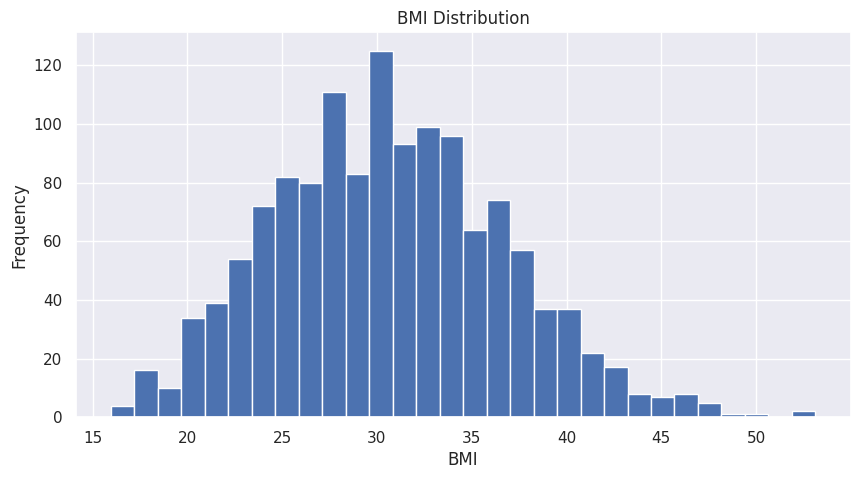

In [459]:
#We can see it easily with histogram.
insurance['bmi'].hist(bins= 30, figsize=(10, 5))
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [460]:
insurance[["smoker_encode", "charges"]].corr()
#When we look for correlation between smoker and charges, we can see that they have powerfull correlation.

,smoker_encode,charges
smoker_encode,1.000000,0.787251
charges,0.787251,1.000000


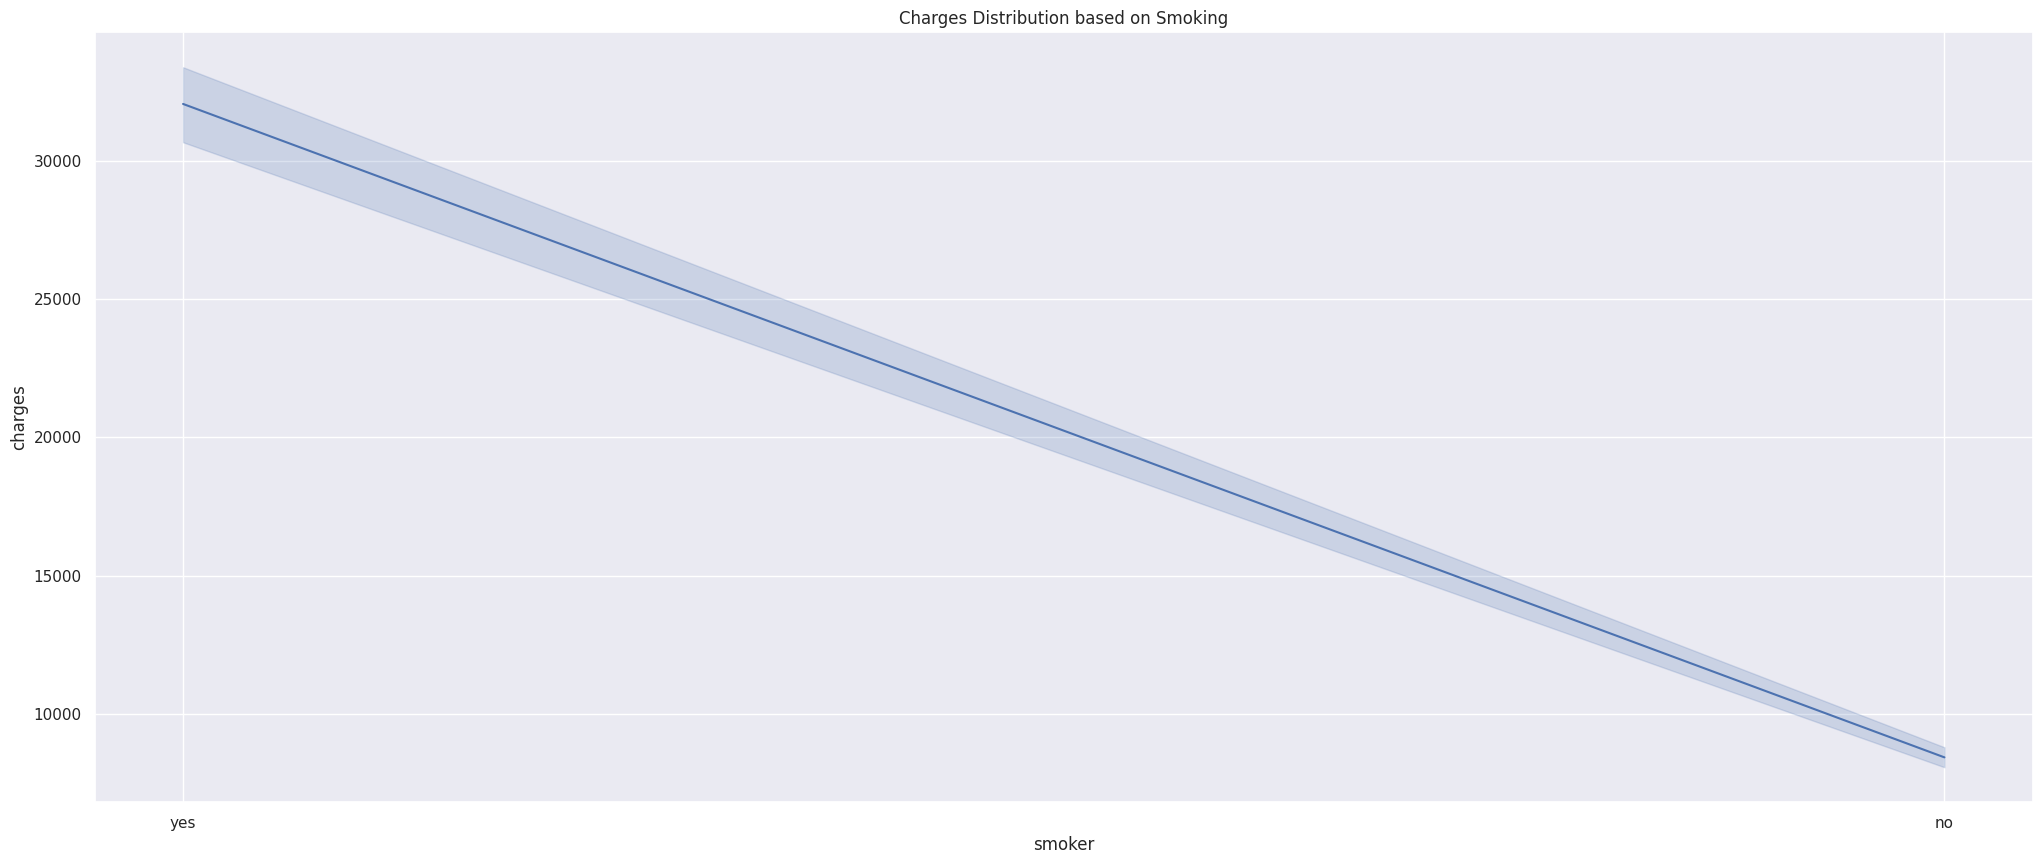

In [461]:
#We can see it when we look at the line plot: If you are a smoker, than you have high charge.
sns.lineplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution based on Smoking')
plt.show()

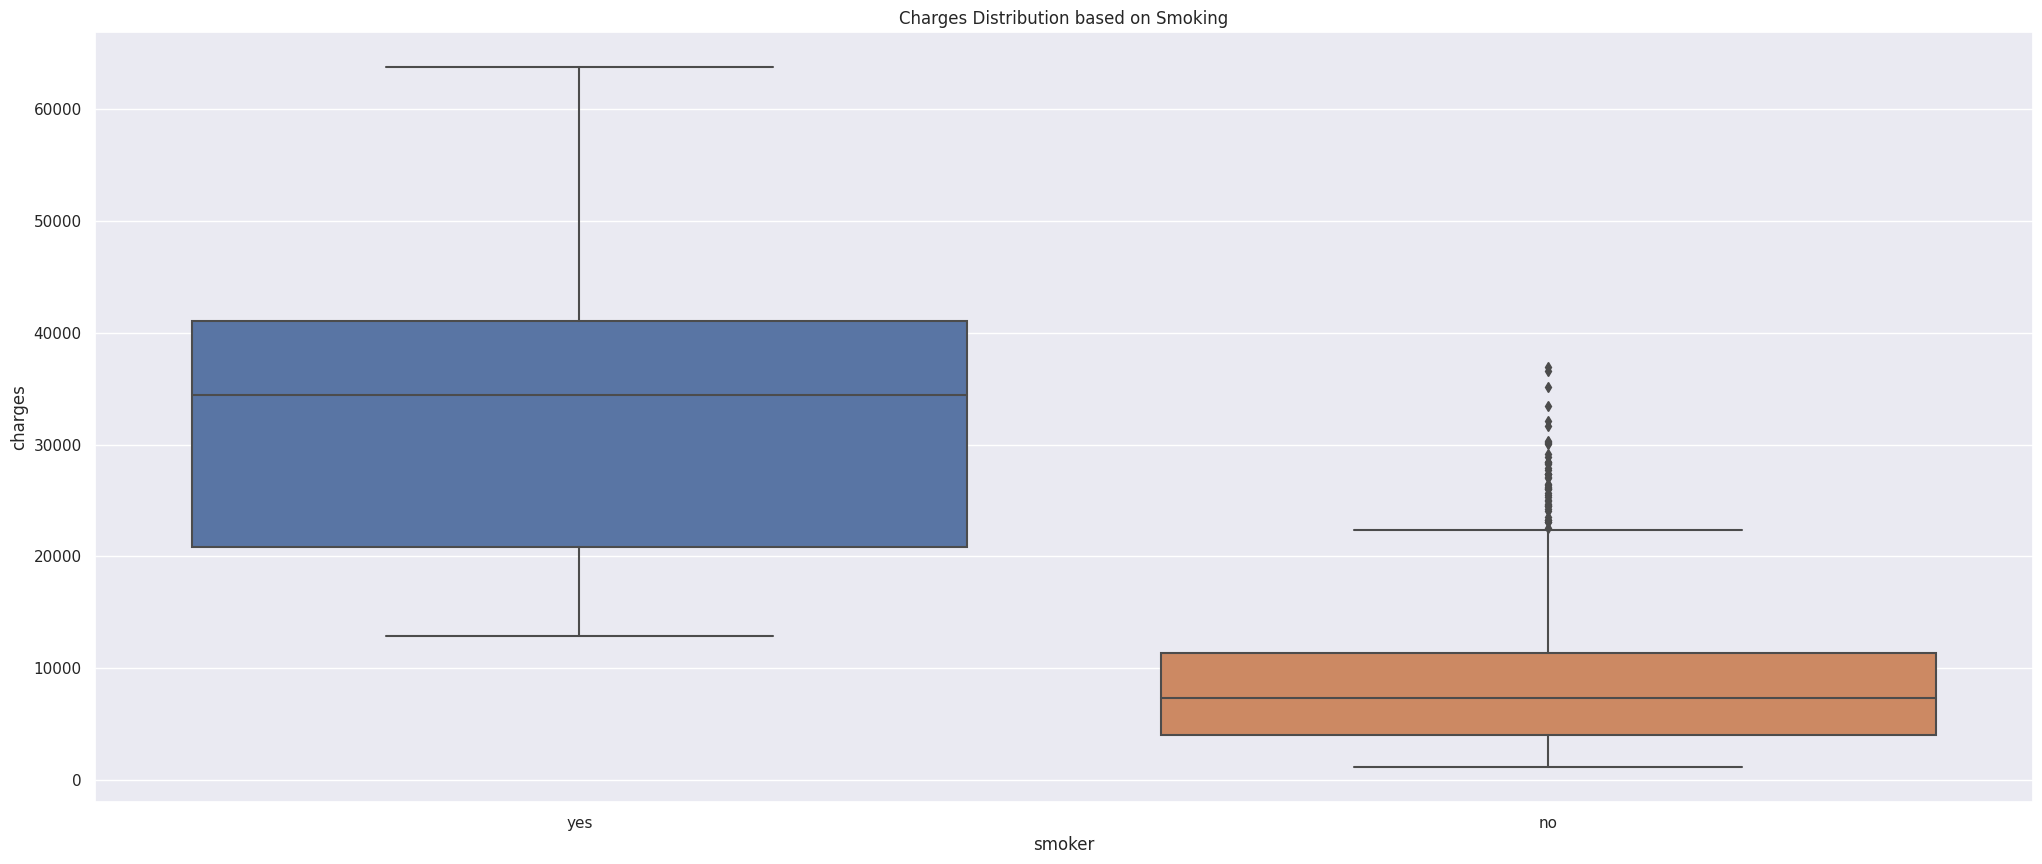

In [462]:
#We can see this relationship at box plot too. There are some outliers like no-smoker but have high charge.
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution based on Smoking')
plt.show()

In [463]:
# Correlation between smoker and region. The correlation is almost 0.
insurance[["smoker_encode", "region_encode"]].corr()

,smoker_encode,region_encode
smoker_encode,1.000000,-0.002181
region_encode,-0.002181,1.000000


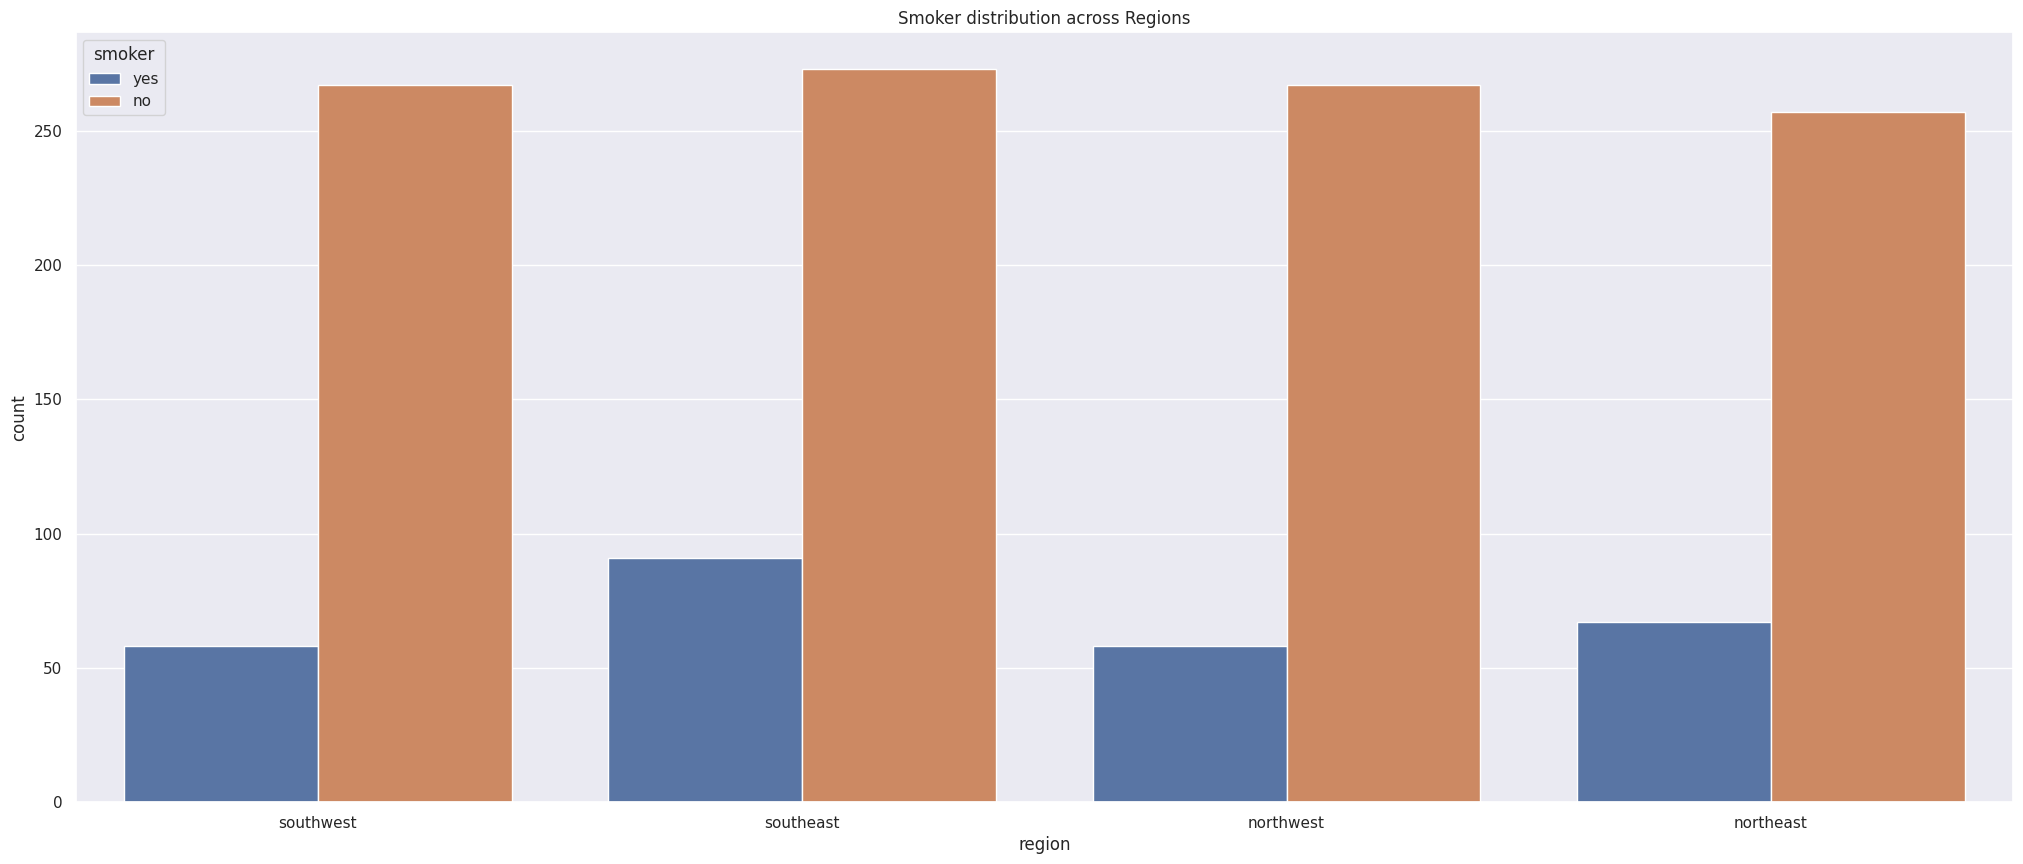

In [464]:
#The number of smokers across regions seems fairly even, with no single region having an exceptionally high or low number of smokers.
sns.countplot(x='region', hue='smoker', data=insurance)
plt.title('Smoker distribution across Regions')
plt.show()

In [465]:
#Correlation between sex and bmi
insurance[["sex_encode", "bmi"]].corr()

,sex_encode,bmi
sex_encode,1.000000,0.046371
bmi,0.046371,1.000000


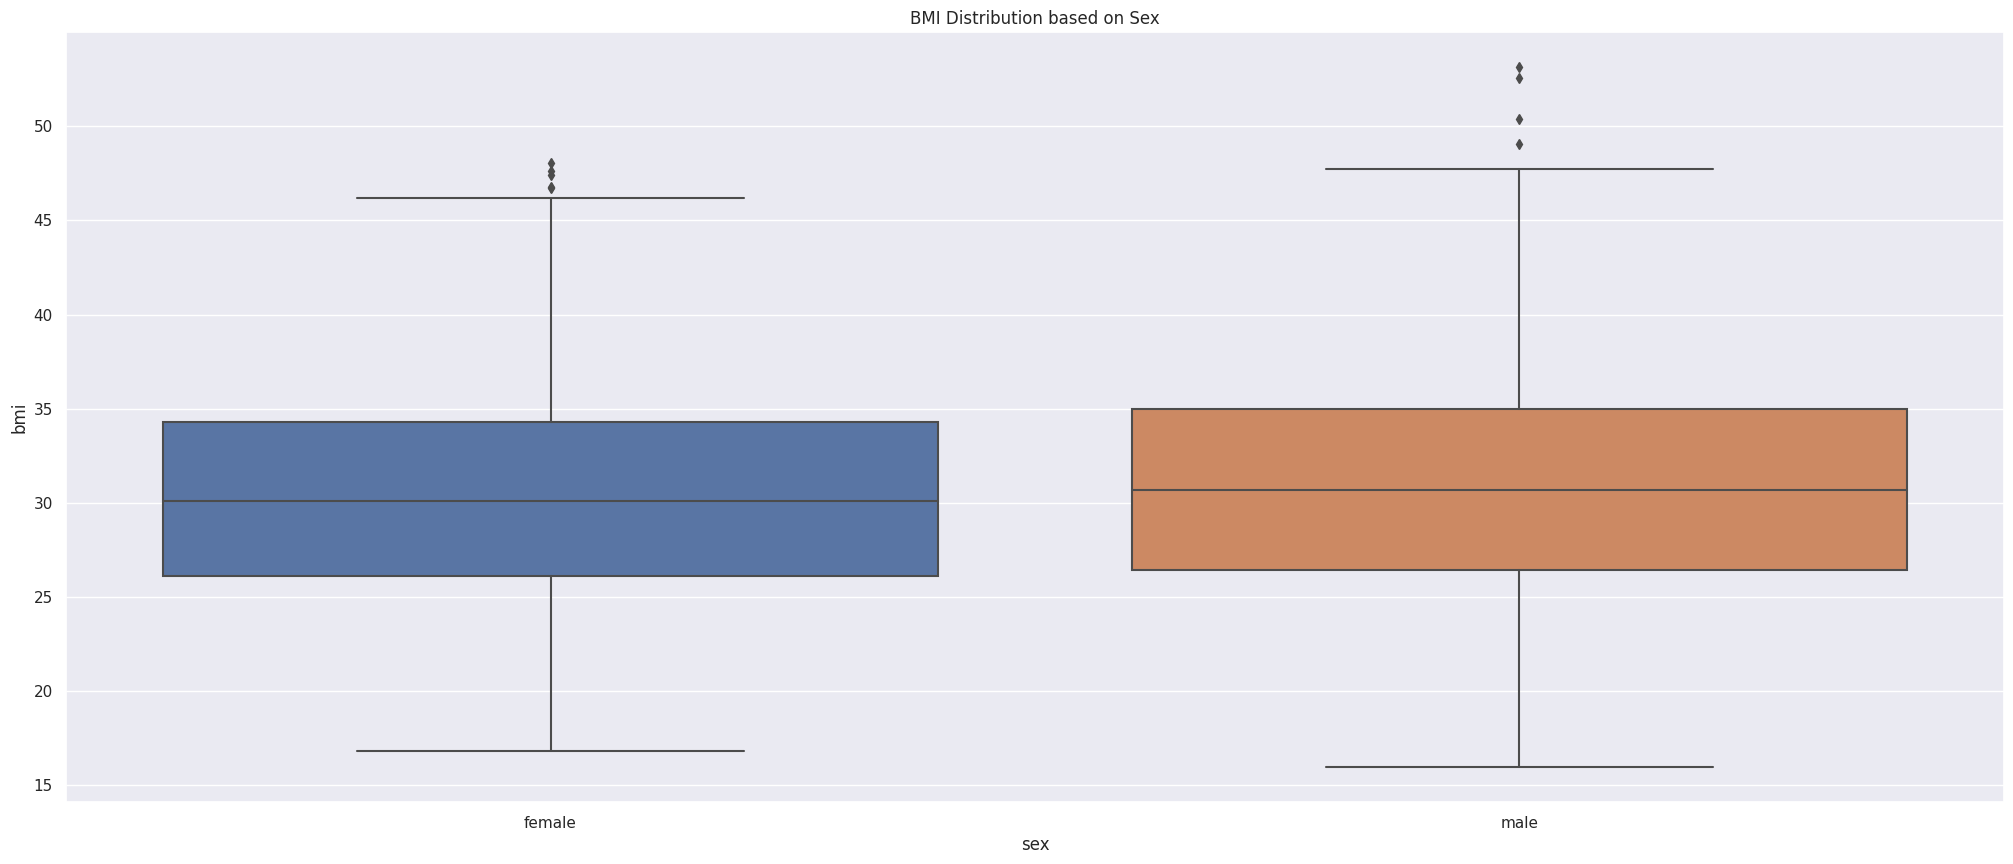

In [466]:
#Both sexes have a similar median BMI. However, the spread of BMI values might be slightly different.
sns.boxplot(x='sex', y='bmi', data=insurance)
plt.title('BMI Distribution based on Sex')
plt.show()

In [467]:
#Correlation between age and bmi
insurance[["age", "bmi"]].corr()

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


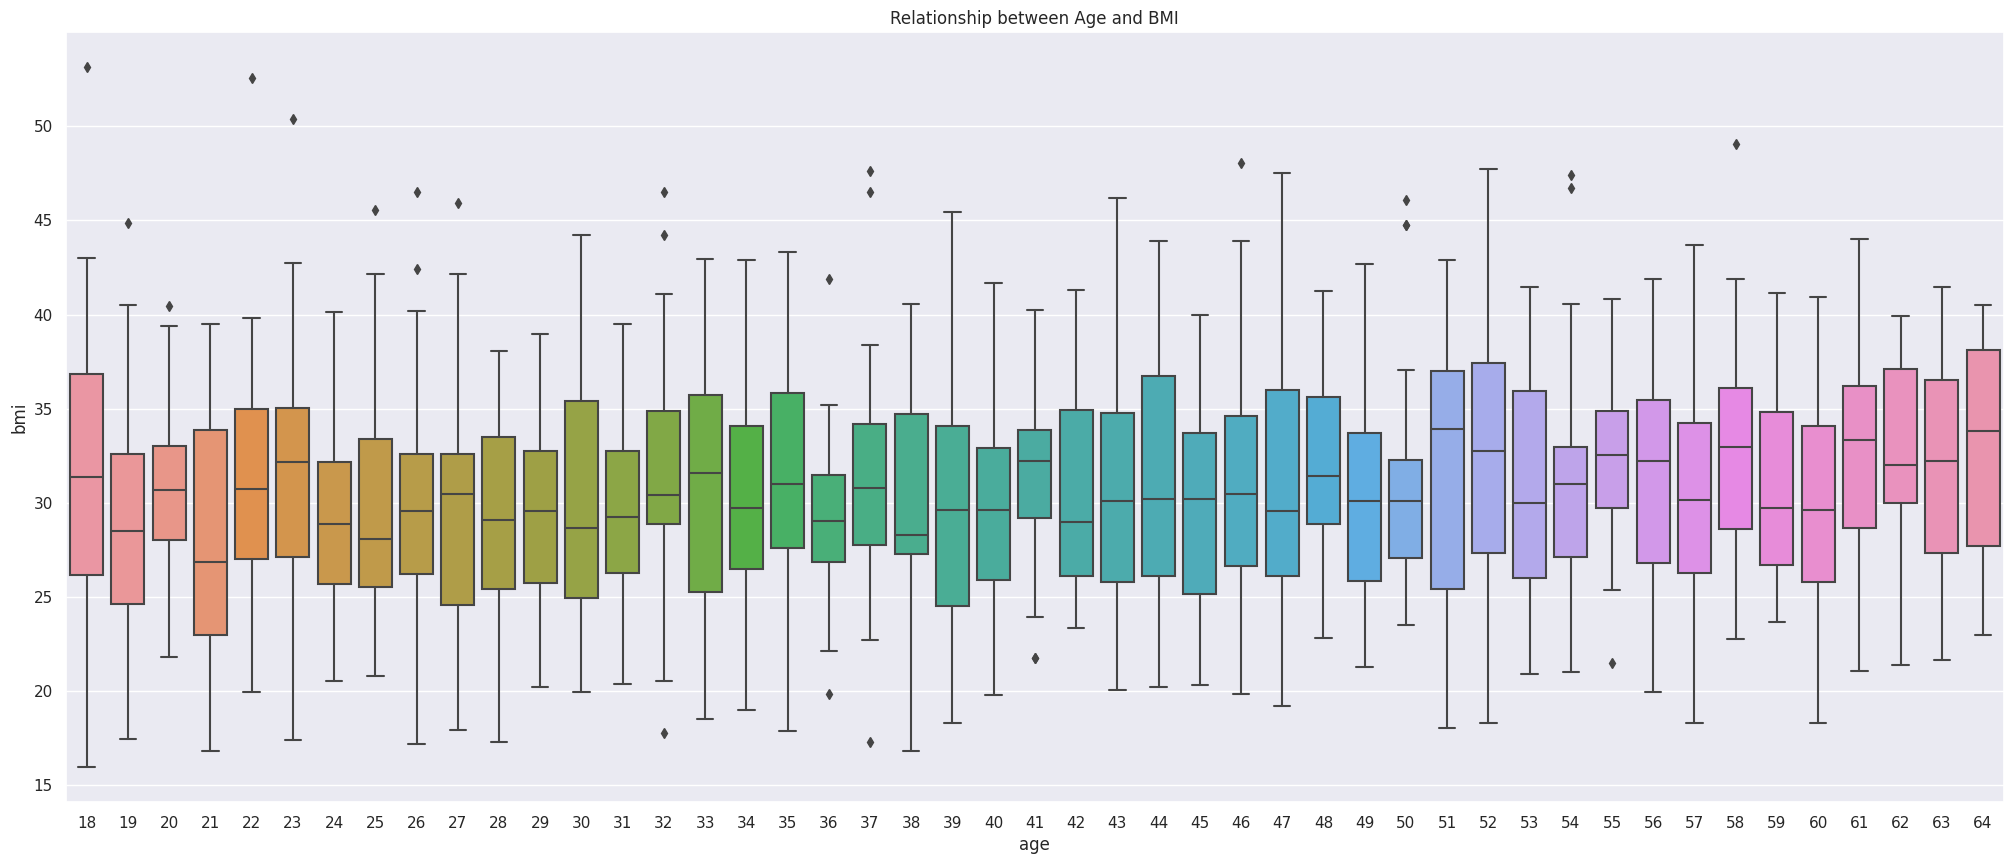

In [468]:
#We can see all bmi distribution for all ages. We can say that some ages have outliers.
#However, age is not necessary for say something about bmi. The correlation is low.
sns.boxplot(x='age', y='bmi', data=insurance,)
sns.set(rc={'figure.figsize':(25,10)})
plt.title('Relationship between Age and BMI')
plt.show()

In [469]:
#Correlation between bmi and children. It is also low.
insurance[["bmi", "children"]].corr()

,bmi,children
bmi,1.000000,0.012759
children,0.012759,1.000000


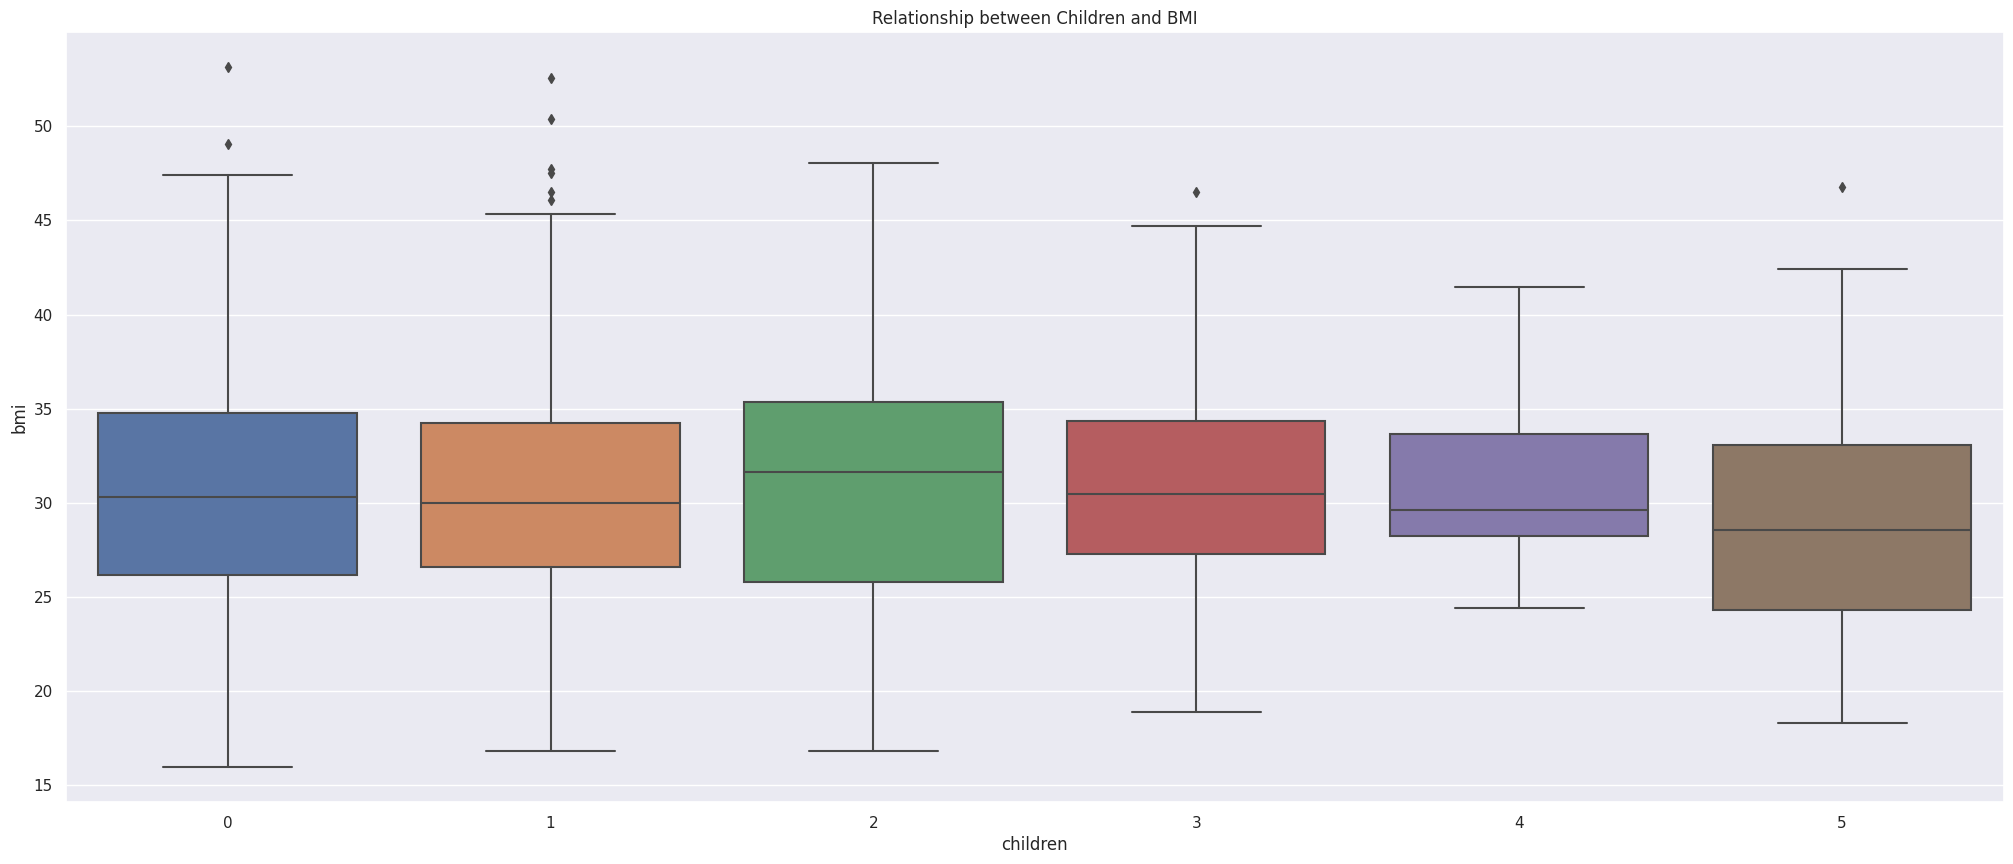

In [470]:
#There is no drastic relationship.
sns.boxplot(x='children', y='bmi', data=insurance)
plt.title('Relationship between Children and BMI')
plt.show()

In [471]:
#Correlation between bmi and charges
insurance[["bmi", "charges"]].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


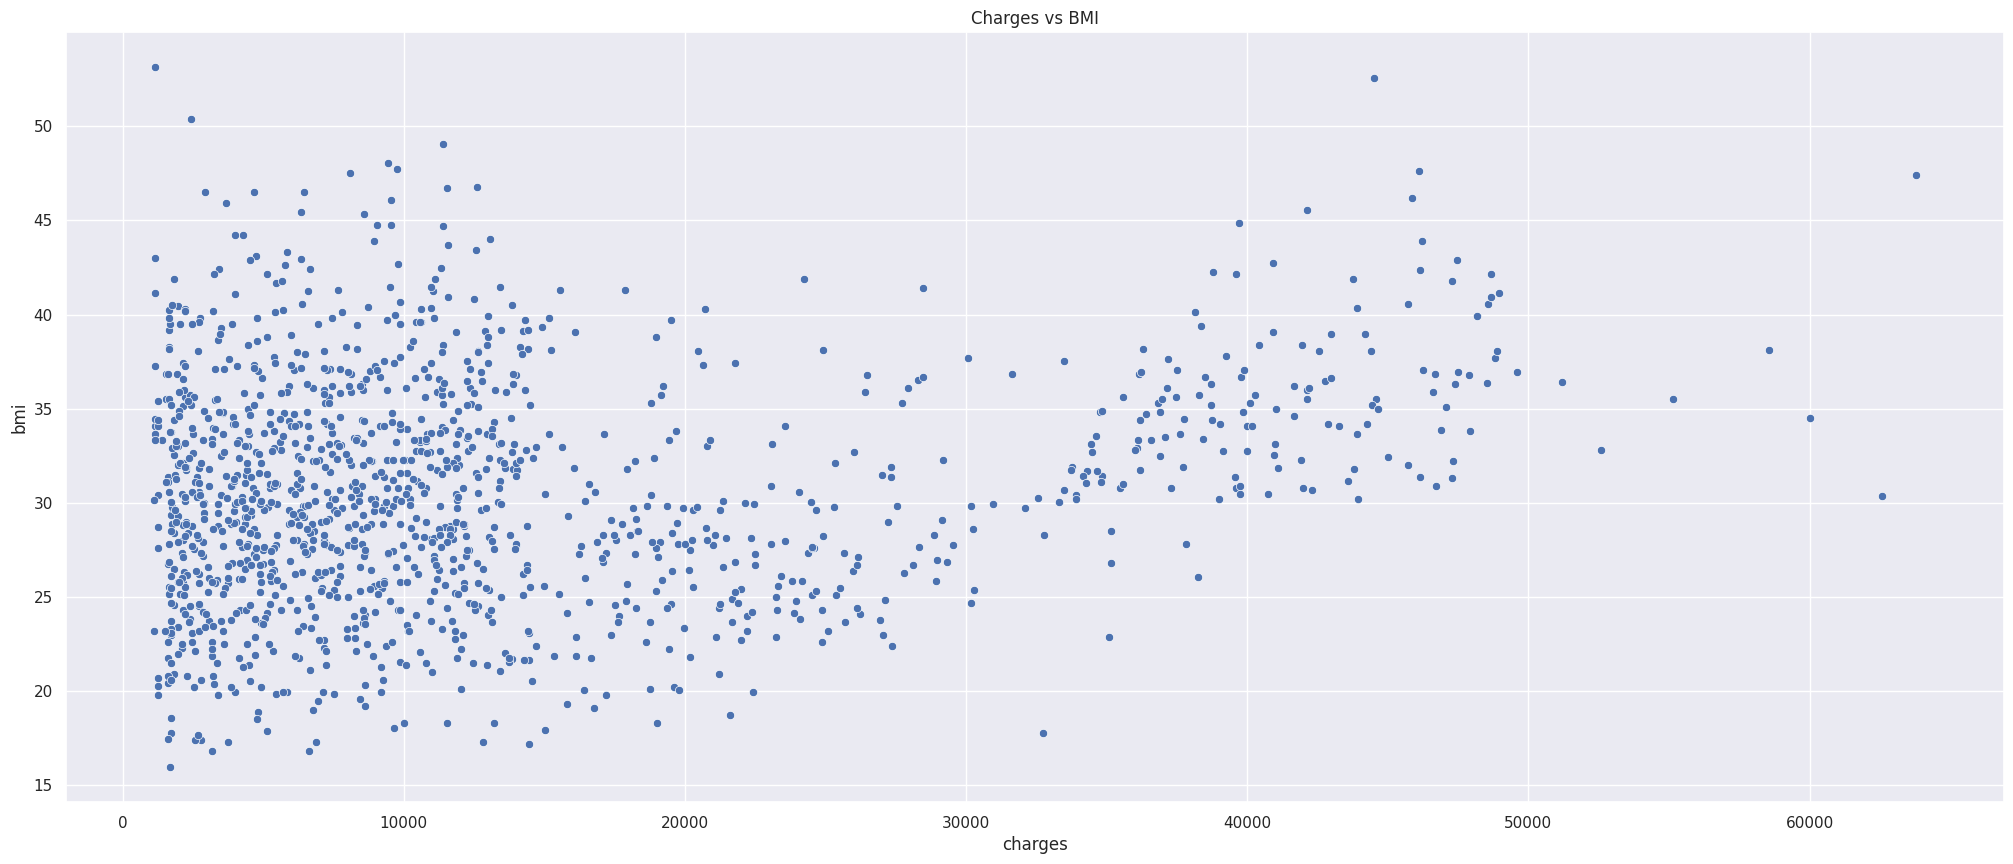

In [472]:
#We can not say anything definite. Because when charges low, there is a crowd.
sns.scatterplot(x='charges', y='bmi', data=insurance)
plt.title('Charges vs BMI')
plt.show()

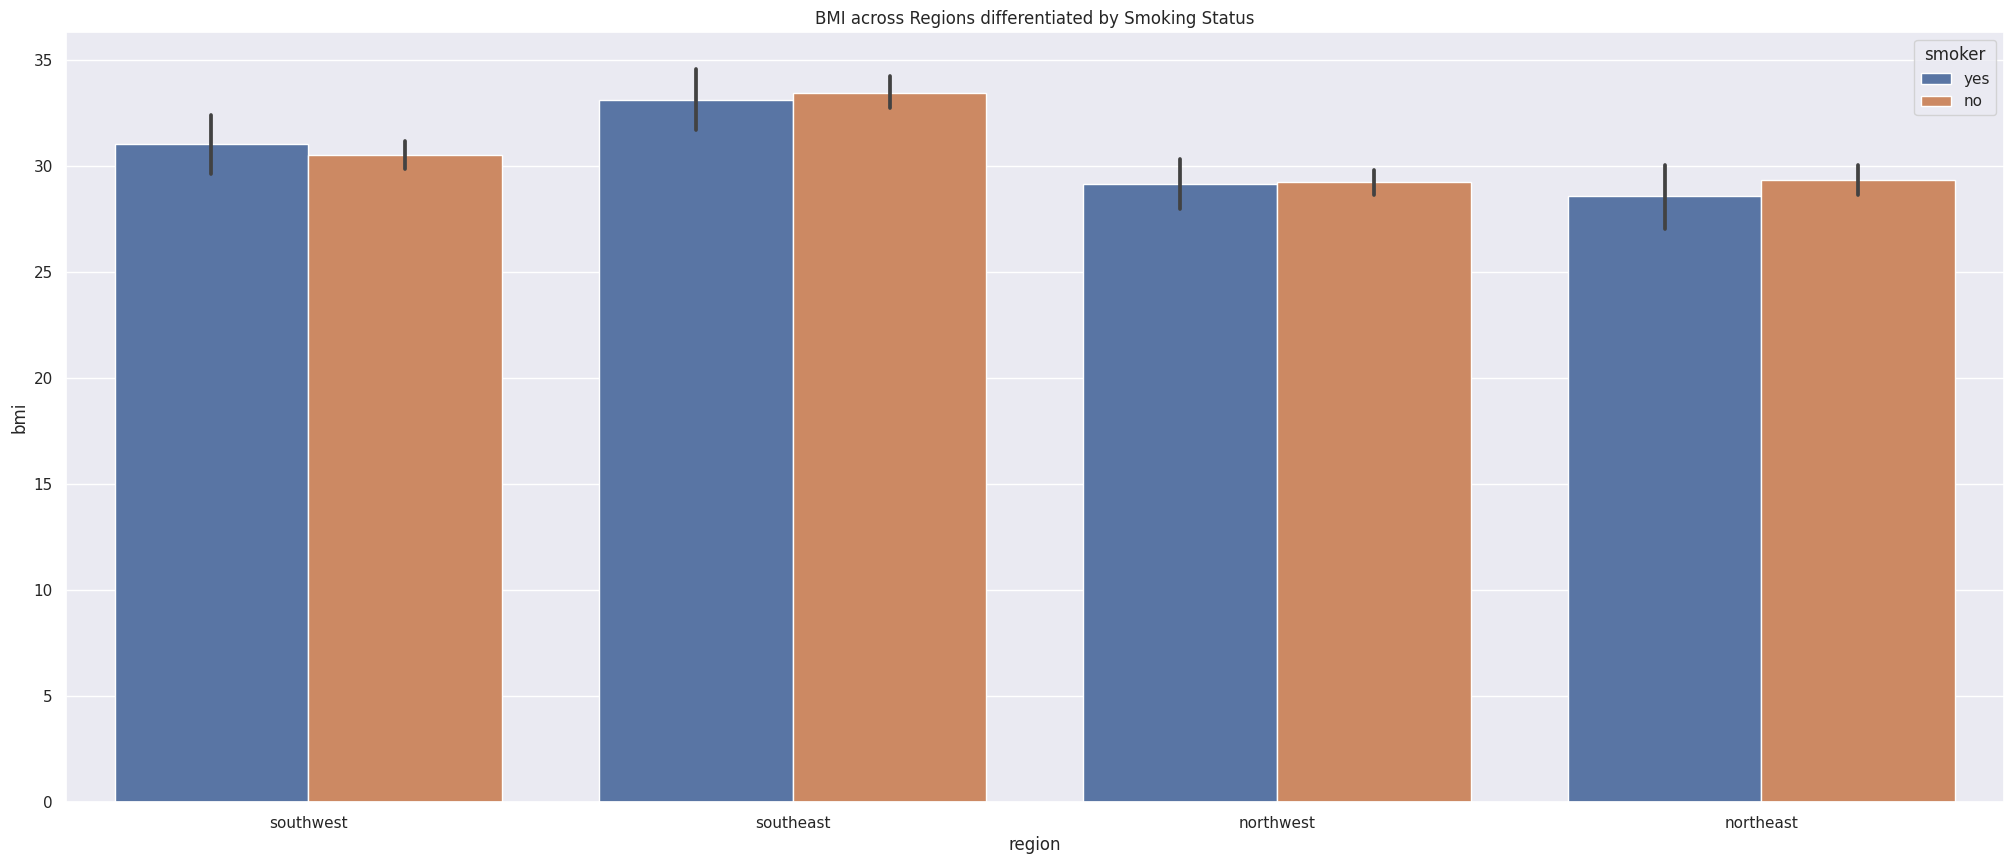

In [473]:
#The the relationship between region, smoker and bmi.
sns.barplot(x='region', y='bmi', hue='smoker', data=insurance)
plt.title('BMI across Regions differentiated by Smoking Status')
plt.show()
#As we can see, almos smokers and non-smokers counts are equal for all regions.

In [474]:
#Region with most children, we have to use group by regions for find sum of children. Than take the maximum value and its region.
region_children = insurance.groupby('region')['children'].sum()
region_with_most_children = region_children.idxmax()
print(f"Region with most children: {region_with_most_children}")

Region with most children: southeast


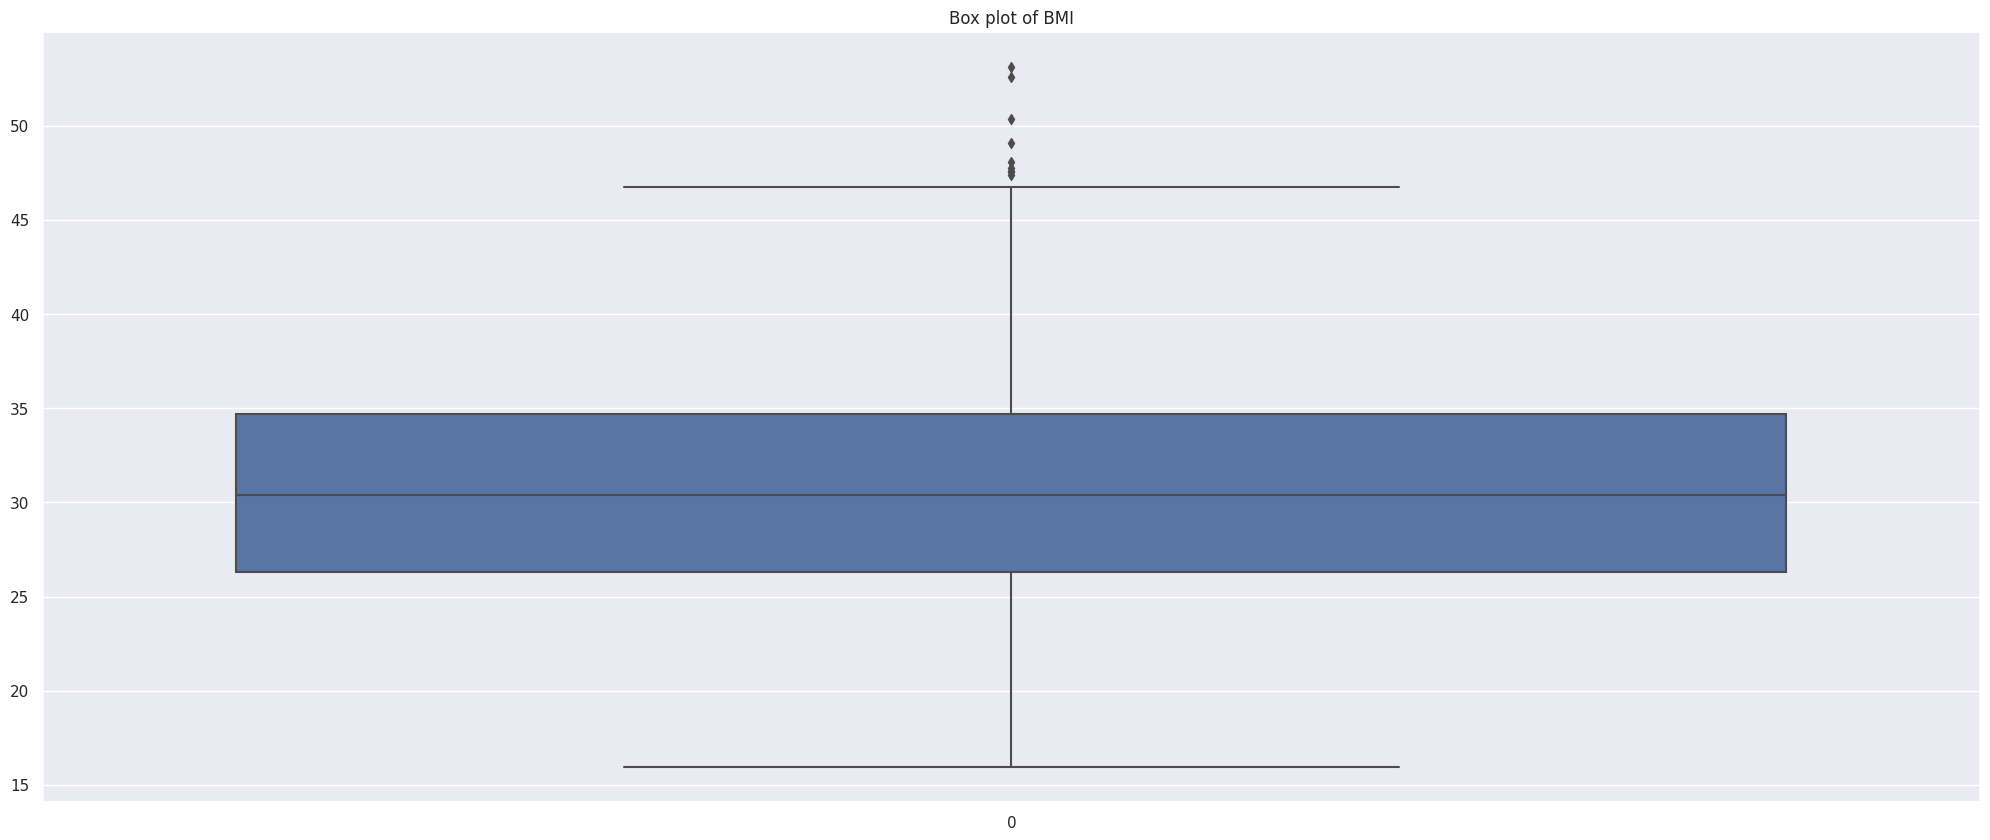

In [475]:
sns.boxplot(insurance['bmi'])
plt.title('Box plot of BMI')
plt.show()

#As we can see there are some outliers at the top of the Box Plot

In [476]:
insurance = pd.get_dummies(insurance, columns=['region'], drop_first=True)
insurance

,age,sex,bmi,children,smoker,charges,sex_encode,smoker_encode,region_encode,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,3,0,0,1
1,18,male,33.770,1,no,1725.55230,1,0,2,0,1,0
2,28,male,33.000,3,no,4449.46200,1,0,2,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,1,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,1,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,0,2,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,3,0,0,1


In [477]:

X = insurance[["age", "bmi", "children", "sex_encode",	"smoker_encode", "region_encode"]]
y = insurance["charges"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_test

,age,bmi,children,sex_encode,smoker_encode,region_encode
764,45,25.175,2,0,0,0
887,36,30.020,0,0,0,1
890,64,26.885,0,0,1,1
1293,46,25.745,3,1,0,1
259,19,31.920,0,1,1,1
...,...,...,...,...,...,...
109,63,35.090,0,1,1,2
575,58,27.170,0,0,0,1
535,38,28.025,1,1,0,0
543,54,47.410,0,0,1,2


In [478]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[ 0.40114007, -0.89153925,  0.73433626, -1.0246016 , -0.50874702,
        -1.35325561],
       [-0.23863782, -0.08946143, -0.91119211, -1.0246016 , -0.50874702,
        -0.45611589],
       [ 1.75178229, -0.60845296, -0.91119211, -1.0246016 ,  1.96561348,
        -0.45611589],
       ...,
       [-0.09646495, -0.41972876, -0.08842793,  0.97598911, -0.50874702,
        -1.35325561],
       [ 1.04091797,  2.78941026, -0.91119211, -1.0246016 ,  1.96561348,
         0.44102382],
       [ 0.82765867,  0.60252728, -0.08842793, -1.0246016 , -0.50874702,
         1.33816354]])

In [479]:
# Create and train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [480]:
# Score the model on the train data
print(model.score(X_train,y_train))

# Score the model on the test data
print(model.score(X_test,y_test))

0.7417049283233981
0.7833463107364537


In [481]:
my_data = np.array([28, 18.72, 3, 1, 1, 2])

# Reshaping and scaling the data
my_data_reshaped = my_data.reshape(1, -1)
my_data_scaled = scaler.transform(my_data_reshaped)
# Predicting
pred = model.predict(my_data_scaled)
print("My charge: {}".format(pred[0]))

My charge: 25898.53080141917


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


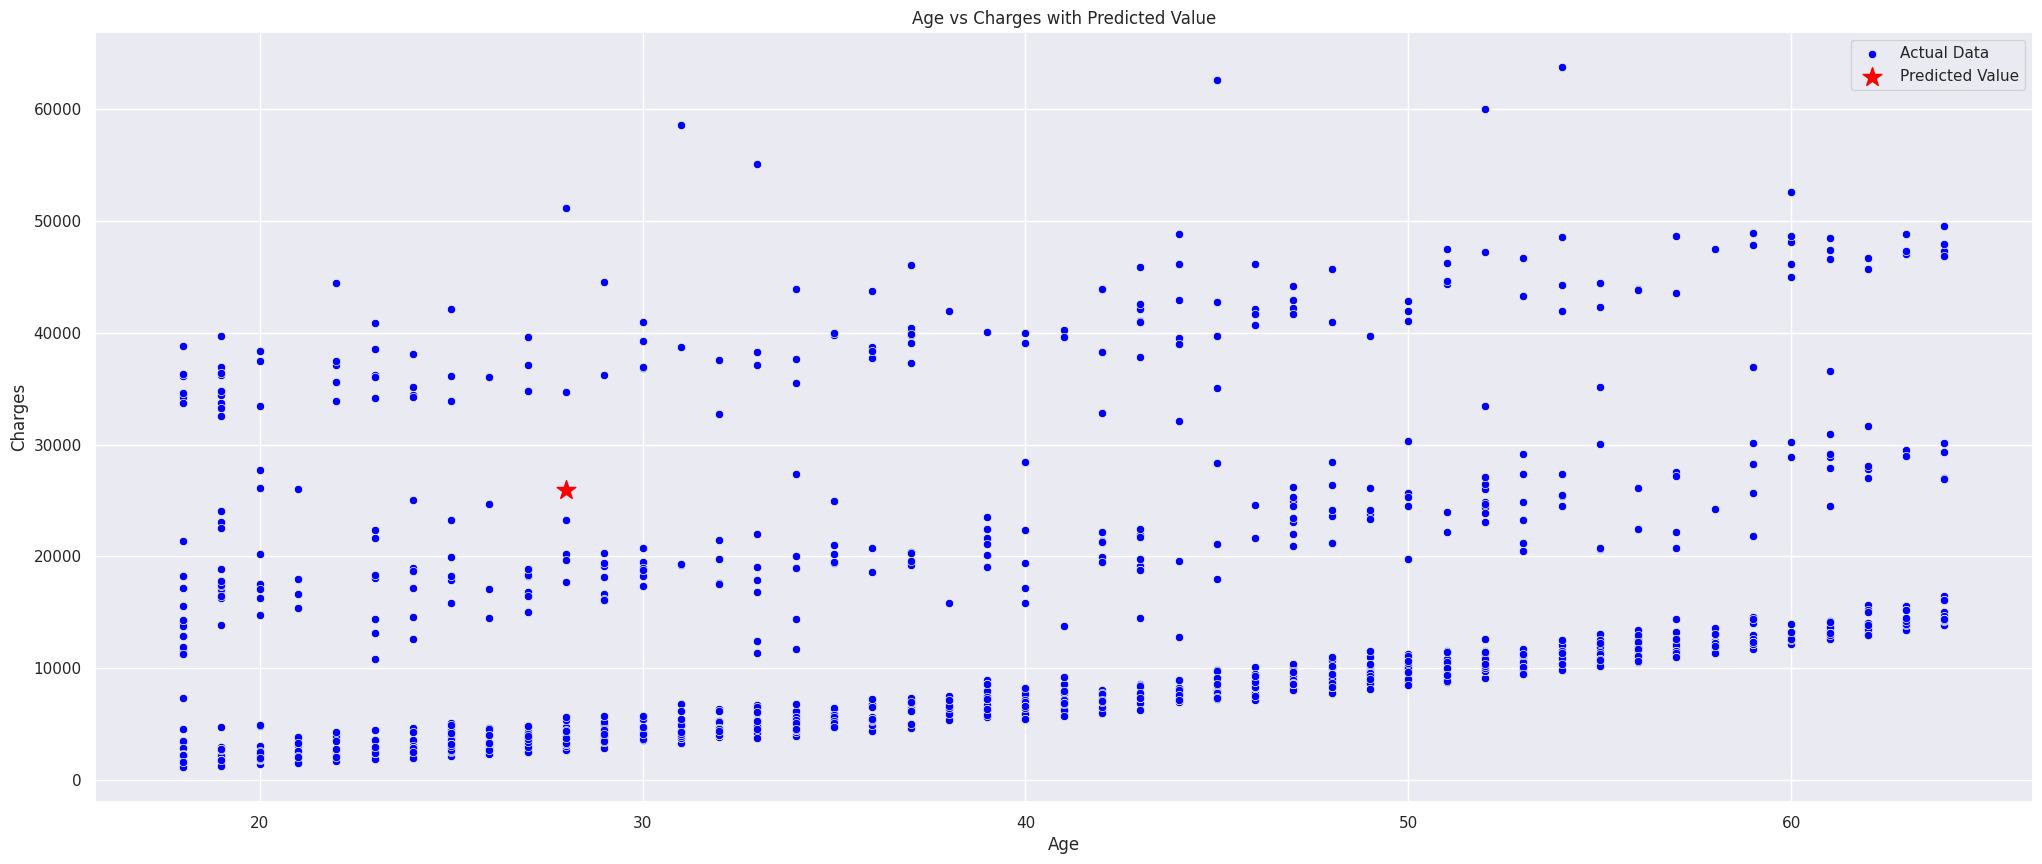

In [482]:
sns.scatterplot(x=insurance['age'], y=insurance['charges'], color='blue', label='Actual Data')

age_value_of_my_data = my_data[0]
plt.scatter(age_value_of_my_data, pred, color='red', marker='*', s=200, label='Predicted Value')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges with Predicted Value')
plt.legend()
plt.show()